In [156]:
import os, sys
sys.path.insert(1, os.getcwd()+'/..')
if (os.getcwd()[-9:] == 'tutorials'):
    os.chdir('../..')

import mspc_pca
from src.msa import generator
from src.msa.visualization import plot
from src.msa.feature_extraction import features
import numpy as np
import matplotlib.pyplot as plt

Generate the signal

In [157]:
sr = 200
T = 4

t0=1
A = 11.2
b = 1.7
w_k = 2*np.pi * 20
phi = .0


T = 10
sr = 300
t = np.linspace(0, T, int(T*sr))
signal = generator.generate_pulse(A,b,t0,t,w_k,phi)
signal = generator.generate_chirp(A,5,15,sr,T,0.0)


win_length = .5 #s 
win_samples = int(win_length*sr)

time, freq, Sxx = features.spectrogram(signal, sr, win_samples,"boxcar", "odd", t_phase =win_length/2)

Sxx.shape

(76, 21)

Plot signal and spectrogram

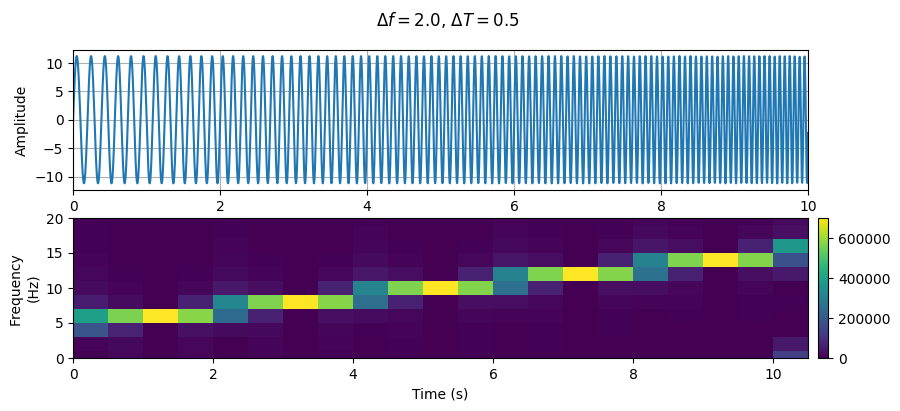

In [158]:

fig, ax = plt.subplots(2,1, figsize=(10,4))
_,ax[0] = plot.signal(t, signal, ax=ax[0])
_, ax[1], mesh =plot.spectrogram(time, freq, Sxx,logscale=False, ax=ax[1], ylim=(0,20))

fig.suptitle(fr"$\Delta f = {1/win_length}$, $\Delta T = {win_length}$")
ax[0].set_ylabel("Amplitude", )
ax[1].set_ylabel("Frequency \n(Hz)", )
ax[1].set_xlabel("Time (s)", )
fig.subplots_adjust(right=0.86)
tbox = ax[0].get_position()
bbox = ax[1].get_position()
cbar_ax = fig.add_axes([0.87, bbox.y0, 0.01, bbox.height])
cbar = fig.colorbar(mesh, cax=cbar_ax)

MEDA

In [159]:
from mspc_pca.pca import *
from mspc_pca.omeda import *
from mspc_pca.mspc import *
from mspc_pca.ckf import *

In [160]:
data = Sxx.T
print(data.shape)

freqs = [f"{round(x,2)} Hz" for x in freq]
times = [f"{round(x,2)} s"  for x in time]

print(freqs)

(21, 76)
['0.0 Hz', '2.0 Hz', '4.0 Hz', '6.0 Hz', '8.0 Hz', '10.0 Hz', '12.0 Hz', '14.0 Hz', '16.0 Hz', '18.0 Hz', '20.0 Hz', '22.0 Hz', '24.0 Hz', '26.0 Hz', '28.0 Hz', '30.0 Hz', '32.0 Hz', '34.0 Hz', '36.0 Hz', '38.0 Hz', '40.0 Hz', '42.0 Hz', '44.0 Hz', '46.0 Hz', '48.0 Hz', '50.0 Hz', '52.0 Hz', '54.0 Hz', '56.0 Hz', '58.0 Hz', '60.0 Hz', '62.0 Hz', '64.0 Hz', '66.0 Hz', '68.0 Hz', '70.0 Hz', '72.0 Hz', '74.0 Hz', '76.0 Hz', '78.0 Hz', '80.0 Hz', '82.0 Hz', '84.0 Hz', '86.0 Hz', '88.0 Hz', '90.0 Hz', '92.0 Hz', '94.0 Hz', '96.0 Hz', '98.0 Hz', '100.0 Hz', '102.0 Hz', '104.0 Hz', '106.0 Hz', '108.0 Hz', '110.0 Hz', '112.0 Hz', '114.0 Hz', '116.0 Hz', '118.0 Hz', '120.0 Hz', '122.0 Hz', '124.0 Hz', '126.0 Hz', '128.0 Hz', '130.0 Hz', '132.0 Hz', '134.0 Hz', '136.0 Hz', '138.0 Hz', '140.0 Hz', '142.0 Hz', '144.0 Hz', '146.0 Hz', '148.0 Hz', '150.0 Hz']


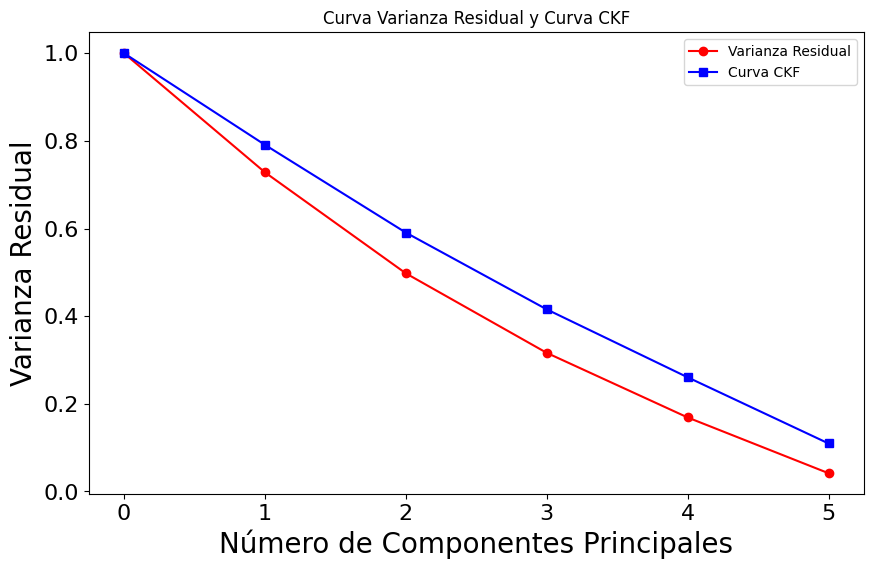

In [161]:

pca_resvar(Sxx, 5);


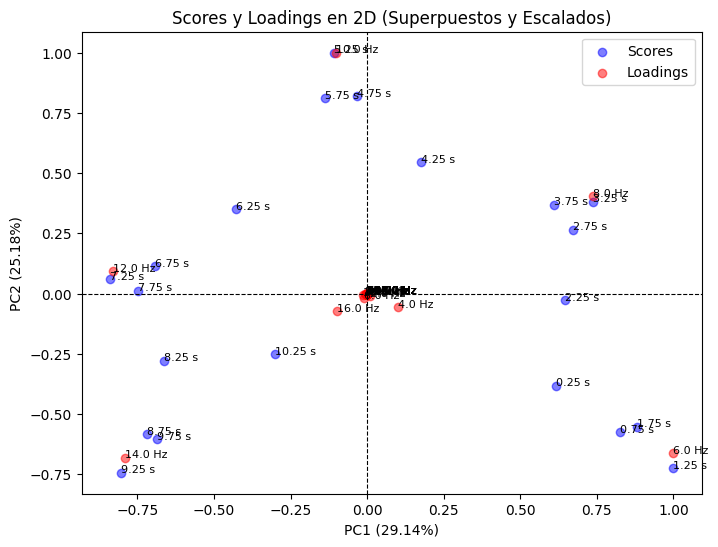

In [162]:

data_fit, pca = adjust_PCA(data, 2)
combine_plots(data_fit, 0, 1, pca,times, freqs)

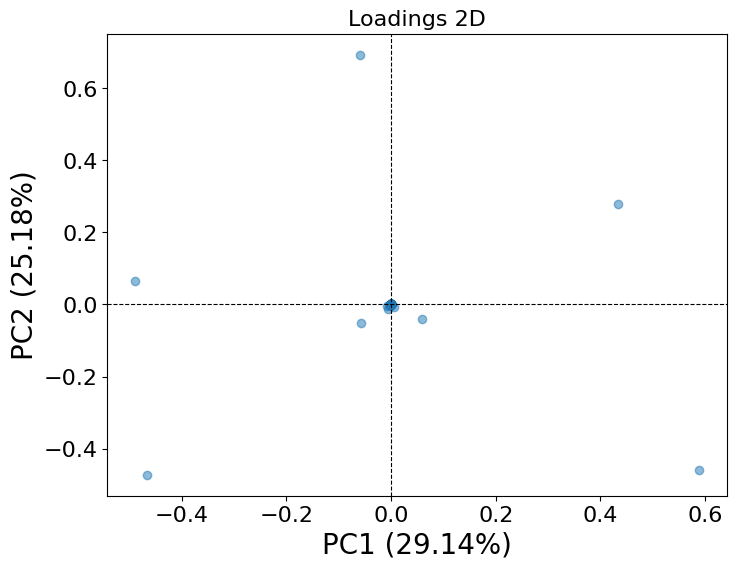

In [163]:
plot_loadings_2d(1,2,pca )